In [7]:
import sys
print(sys.executable)


c:\Users\marya\AppData\Local\Programs\Python\Python314\python.exe


In [8]:
!{sys.executable} -m pip install numpy


In [9]:
# Notebook cell 1: imports
import sys
import os
import time
time.sleep(0.1)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Ensure Python can find the lib folder
sys.path.append(os.path.abspath(".."))

# Import your library
from lib.layers import Dense
from lib.activations import Tanh, Sigmoid
from lib.network import Network
from lib.losses import mse_loss
from lib.optimizer import SGD

print("Imports successful!")


Imports successful!


In [10]:
# Notebook cell 2: XOR dataset
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
], dtype=float)

y = np.array([[0],[1],[1],[0]], dtype=float)

print("XOR dataset:")
print(X)
print(y)


XOR dataset:
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
[[0.]
 [1.]
 [1.]
 [0.]]


In [11]:
# Notebook cell 3: Build the network
layers = [
    Dense(2, 8),  # 8 hidden neurons for better convergence
    Tanh(),
    Dense(8, 1),
    Sigmoid()
]

# Use SGD optimizer
model = Network(layers, optimizer=SGD(lr=0.5))

print("Model created successfully!")


Model created successfully!


Epoch 0 - Loss: 0.2549192212167234
Epoch 200 - Loss: 0.22682513457779468
Epoch 400 - Loss: 0.17721679692560444
Epoch 600 - Loss: 0.10984162029566596
Epoch 800 - Loss: 0.05613311659279609
Epoch 1000 - Loss: 0.02992620553450913
Epoch 1200 - Loss: 0.018197357064439007
Epoch 1400 - Loss: 0.012347886078507165
Epoch 1600 - Loss: 0.009057199950660092
Epoch 1800 - Loss: 0.007019280809034668
Epoch 2000 - Loss: 0.005661685171814562
Epoch 2200 - Loss: 0.00470547573779437
Epoch 2400 - Loss: 0.004002130492567394
Epoch 2600 - Loss: 0.003466649348581702
Epoch 2800 - Loss: 0.0030474378731618753
Epoch 3000 - Loss: 0.0027116234982921613
Epoch 3200 - Loss: 0.0024373984468934935
Epoch 3400 - Loss: 0.0022097936378538503
Epoch 3600 - Loss: 0.0020182308452223576
Epoch 3800 - Loss: 0.0018550449041606959
Epoch 4000 - Loss: 0.0017145589942423461
Epoch 4200 - Loss: 0.0015924876281495457
Epoch 4400 - Loss: 0.0014855404698511934
Epoch 4600 - Loss: 0.0013911529480879698
Epoch 4800 - Loss: 0.0013072990698217188
Epoc

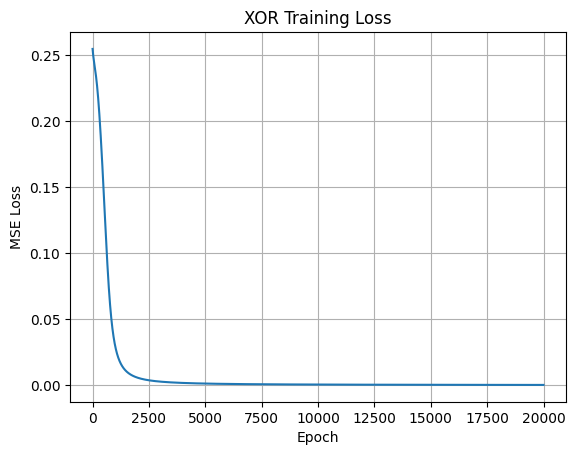

In [12]:
# Notebook cell 4: Training
epochs = 20000  # longer training to guarantee convergence
losses = model.fit(X, y, mse_loss, epochs=epochs)

# Plot loss curve
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("XOR Training Loss")
plt.grid(True)
plt.show()


In [13]:
# Notebook cell 5: Final predictions
preds = model.forward(X)

print("Predictions (probabilities):")
print(preds)

print("\nRounded predictions (0/1):")
print((preds > 0.5).astype(int))


Predictions (probabilities):
[[0.0085179 ]
 [0.98448296]
 [0.98457189]
 [0.01667829]]

Rounded predictions (0/1):
[[0]
 [1]
 [1]
 [0]]
